In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import pickle


In [2]:
df = pd.read_csv("iffco_urea_dataset_long.csv")
print(df.head())


        Crop  Land_Area_ha Soil_Fertility Growth_Stage   Region  Urea_kg
0    Mustard          0.51           High          Mid  Central    15.44
1  Sugarcane          0.64           High          Mid     East    46.67
2     Cotton          0.67            Low      Initial  Central    23.97
3    Mustard          1.68           High         Late     East    17.93
4      Maize          0.57         Medium          Mid     East    29.40


In [3]:
label_encoders = {}
for col in ['Crop', 'Soil_Fertility', 'Growth_Stage', 'Region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [4]:
X = df[['Crop', 'Land_Area_ha', 'Soil_Fertility', 'Growth_Stage', 'Region']]
y = df['Urea_kg']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", round(mae, 2))


Mean Absolute Error (MAE): 5.24


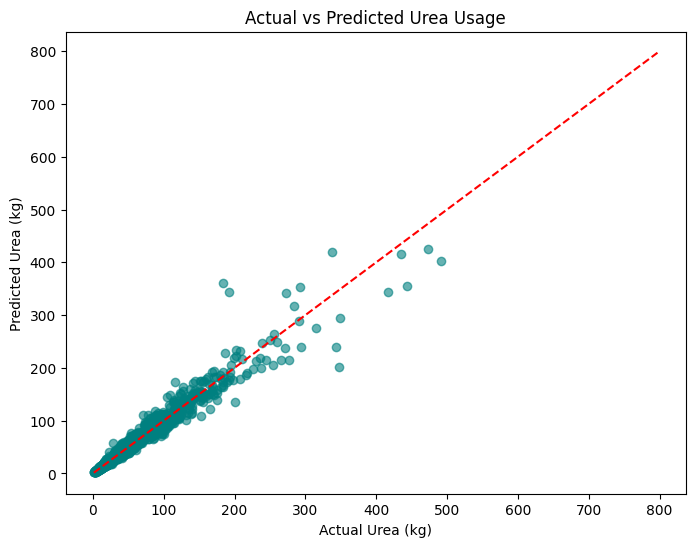

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Urea (kg)")
plt.ylabel("Predicted Urea (kg)")
plt.title("Actual vs Predicted Urea Usage")
plt.show()


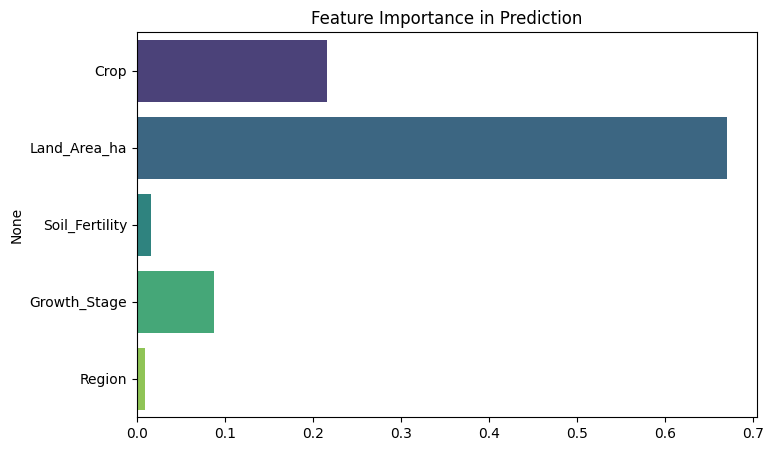

In [9]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, hue=features, palette="viridis", legend=False)
plt.title("Feature Importance in Prediction")
plt.show()


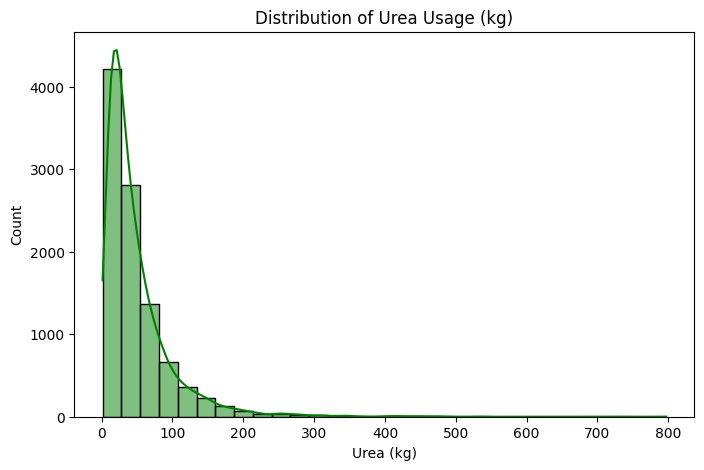

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Urea_kg'], kde=True, bins=30, color="green")
plt.title("Distribution of Urea Usage (kg)")
plt.xlabel("Urea (kg)")
plt.ylabel("Count")
plt.show()


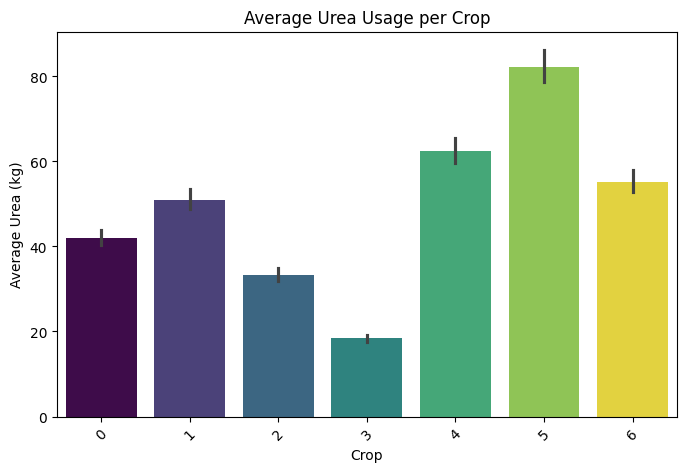

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x="Crop", y="Urea_kg", data=df, estimator=np.mean, hue="Crop", palette="viridis", legend=False)
plt.title("Average Urea Usage per Crop")
plt.ylabel("Average Urea (kg)")
plt.xticks(rotation=45)
plt.show()


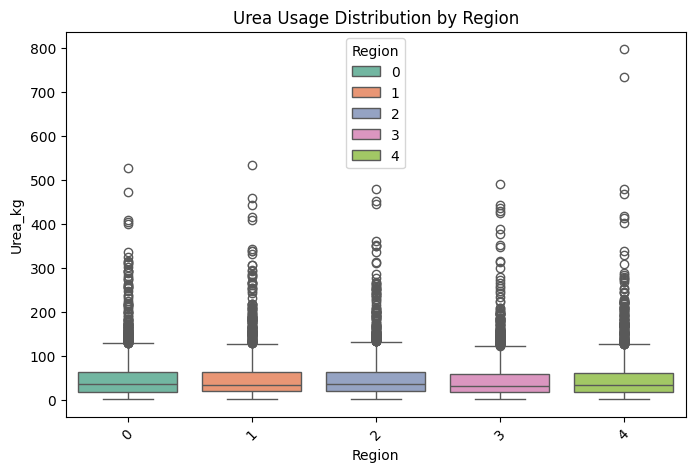

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Region", y="Urea_kg", data=df, hue= "Region",palette="Set2")
plt.title("Urea Usage Distribution by Region")
plt.xticks(rotation=45)
plt.show()


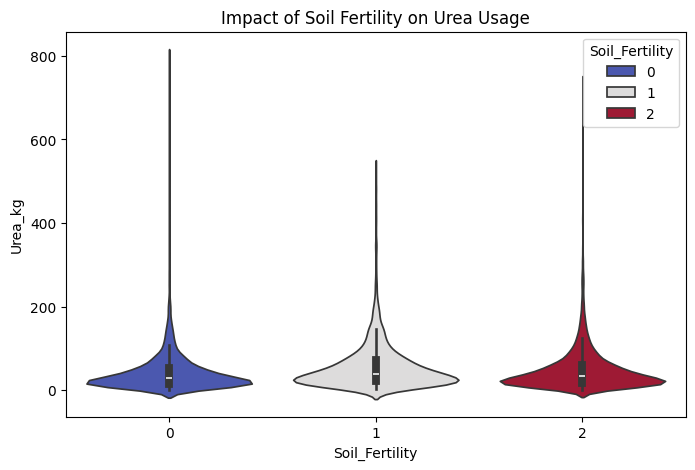

In [13]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Soil_Fertility", y="Urea_kg", data=df,hue="Soil_Fertility", palette="coolwarm")
plt.title("Impact of Soil Fertility on Urea Usage")
plt.show()


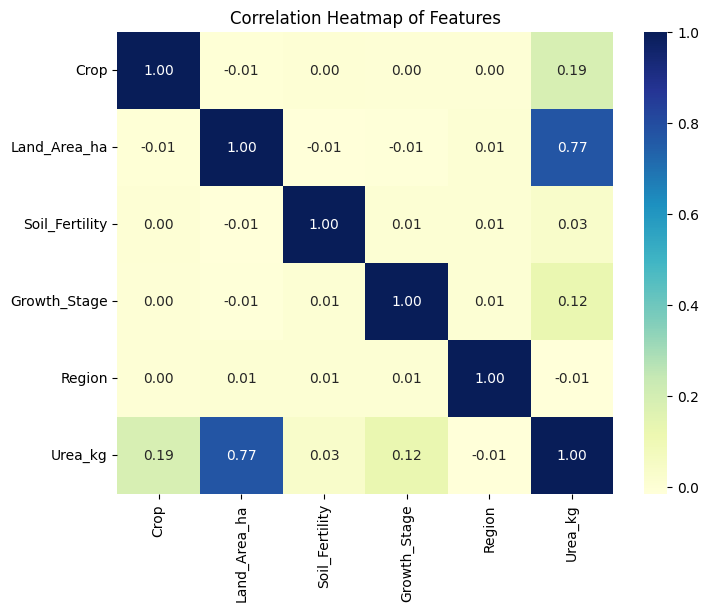

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


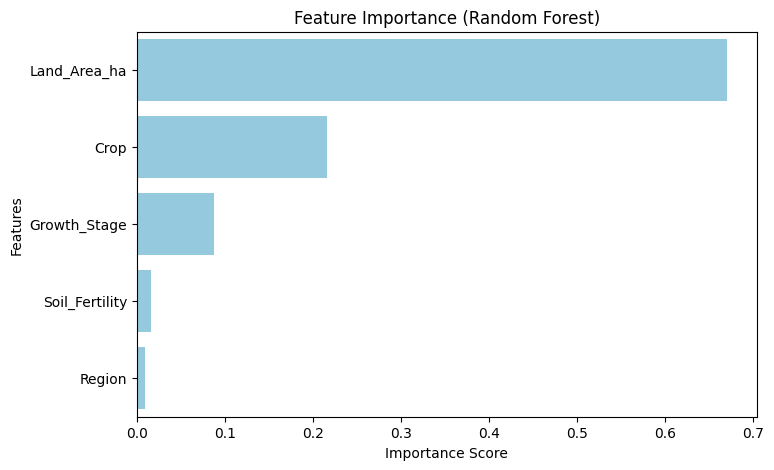

In [15]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]   # sort descending

plt.figure(figsize=(8,5))
sns.barplot(
    x=importances[indices],
    y=features[indices],
    color="skyblue"   # ✅ use single color instead of palette to avoid warning
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [16]:
with open("urea_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("✅ Model and encoders saved successfully.")


✅ Model and encoders saved successfully.
